# <h1><center> COMMUNICATION THROUGH DATA and STORY THROUGH VISUALIZATION </center></h1>

## Models/Visualizations

### Meenakshi Nerolu           
### Date: Nov 11, 2020

## Importing Libraries

In [1]:
## import packages:
import numpy as np # for vector operations
from numpy import percentile
import pandas as pd # for Data Frame methods
import matplotlib.pyplot as plt # Two dimensional plotting library
import matplotlib as mpl
import seaborn as sns #  library for making statistical graphics
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly import tools
#from plotly.offline import iplot, init_notebook_mode
#init_notebook_mode()
### Adjusting Figure Size ##

#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 12
#fig_size[1] = 6
#plt.rcParams.update({'font.size':12})

# 1.Traffic Violation <a class="anchor" id="sec3"></a> 

 ## Reading "Traffic_Violations" data <a class="anchor" id="subsec_3_1"></a>  

In [2]:
    # Reading csv file
    #traffic = pd.read_csv("Traffic_Violations.csv",low_memory=False)
    
    ## Downloading & Reading csv file from website
    url = 'https://data.montgomerycountymd.gov/api/views/4mse-ku6q/rows.csv?accessType=DOWNLOAD'
    traffic = pd.read_csv(url,low_memory=False)

In [3]:
"""" UseFeatues() Function when called, returns a dataframe with additional features"""

def useFeatures(traffic):

    ## Formatting the Date
    ## Replace white space everywhere
    traffic.columns = traffic.columns.str.replace(' ', '')
    # Confirm the date column is in datetime format
    traffic['DateOfStop'] = pd.to_datetime(traffic['DateOfStop'])

    # Confirm the  time column is in datetime format
    traffic['TimeOfStop'] = pd.to_datetime(traffic['TimeOfStop'])
    # creating  new columns: date, year, month, day, time 
    traffic['date'] = pd.to_datetime(traffic['DateOfStop'])
    traffic['year'] = traffic['DateOfStop'].dt.year
    traffic['month'] = traffic['DateOfStop'].dt.month
    traffic['time'] = traffic['TimeOfStop'].dt.time
    traffic['hour'] = traffic['TimeOfStop'].dt.hour
    traffic['day'] = traffic['DateOfStop'].dt.weekday_name
    
    traffic = traffic.sort_values(by='date')
    

    
    ## Filtering the Desired Date Range - 2015 to 2020 ##
    traffic = traffic[traffic.date >='01/01/2015']
    traffic = traffic[traffic.date <'11/10/2020']
    traffic = traffic.reset_index(drop=True)
    
    traffic['season']= "Fall"
    traffic.loc[(traffic['month'] < 3) | (traffic['month'] >= 12), "season"] = 'Winter'
    traffic.loc[(traffic['month'] < 6) & (traffic['month'] >= 3), "season"] = 'Spring'
    traffic.loc[(traffic['month'] < 9) & (traffic['month'] >= 6), "season"] = 'Summer'
    
    ## Hour status
    ##traffic["hourStatus"] = "Evening"
    ## traffic.loc[( traffic["hour"] < 18) & ( traffic["wdayStatus"] == "Weekday"), "hourStatus"]="WorkHour"
    
    #Creating a new column to count the total number of violation
    traffic['Violation'] = pd.Series(1, index=traffic.index)
    
    return traffic

In [4]:
# All the above features are stored in new data frame "traffic_features"
traffic_features = useFeatures(traffic)

In [5]:
traffic_features.head()

,SeqID,DateOfStop,TimeOfStop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,ArrestType,Geolocation,date,year,month,time,hour,day,season,Violation
0,689e7169-9906-49f5-ac71-db250233411f,2015-01-01,2020-11-11 22:29:00,MCP,"4th District, Wheaton",DRIVING VEH. W/O ADEQUATE REAR REG. PLATE ILLU...,LAYHILL /GLENALLEN,39.063492,-77.051040,No,...,A - Marked Patrol,"(39.0634916666667, -77.05104)",2015-01-01,2015,1,22:29:00,22,Thursday,Winter,1
1,a7132340-1f7c-4f31-9699-9442e67a6812,2015-01-01,2020-11-11 04:49:00,MCP,"4th District, Wheaton",FAILURE TO DRIVE VEHICLE ON RIGHT HALF OF ROAD...,2940 HEWITT AVE,39.060972,-77.046475,No,...,A - Marked Patrol,"(39.0609716666667, -77.046475)",2015-01-01,2015,1,04:49:00,4,Thursday,Winter,1
2,689e7169-9906-49f5-ac71-db250233411f,2015-01-01,2020-11-11 22:29:00,MCP,"4th District, Wheaton",DRIVING VEHICLE ON HIGHWAY WITHOUT CURRENT REG...,LAYHILL /GLENALLEN,39.063492,-77.051040,No,...,A - Marked Patrol,"(39.0634916666667, -77.05104)",2015-01-01,2015,1,22:29:00,22,Thursday,Winter,1
3,9a98f083-5d1f-4ade-b742-35813d4d3bed,2015-01-01,2020-11-11 23:39:00,MCP,"3rd District, Silver Spring",POSSESSING MORE THAN ONE DRIVER'S LICENSE AT A...,BROADBIRCH DRIVE / BOURNEFIELD WAY,39.055635,-76.959328,No,...,A - Marked Patrol,"(39.055635, -76.9593283333333)",2015-01-01,2015,1,23:39:00,23,Thursday,Winter,1
4,e12f54e4-4f2f-4725-a593-452f3b8b3df3,2015-01-01,2020-11-11 19:52:00,MCP,"4th District, Wheaton",FAILURE TO DRIVE VEHICLE ON RIGHT HALF OF ROAD...,4411 DEWEY RD,39.056280,-77.086100,Yes,...,A - Marked Patrol,"(39.05628, -77.0861)",2015-01-01,2015,1,19:52:00,19,Thursday,Winter,1


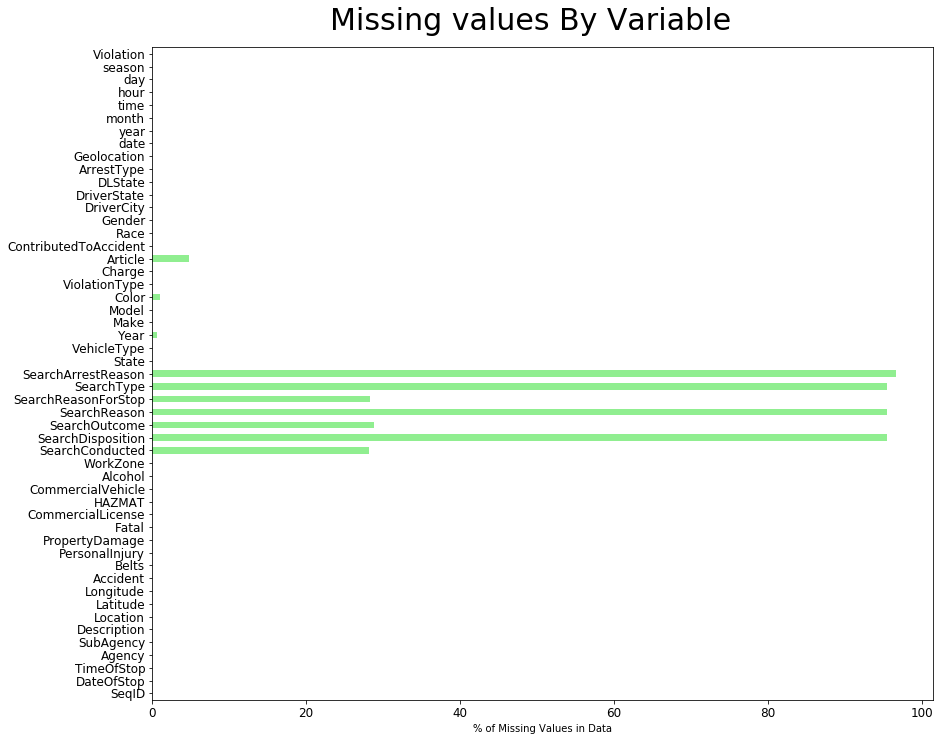

In [6]:
    missing_var = 100*traffic_features.isnull().sum()/traffic_features.shape[0]
    missing_var.sort_values()
   # print(100*traffic_features.isnull().sum()/traffic_features.shape[0]) #missing_var2.index
    plot = missing_var.plot(kind='barh',figsize=(14,12), grid = False,label="Percentage",color='lightgreen',fontsize=12)
    plot.set_xlabel("% of Missing Values in Data")
    plt.figtext(.5,0.9,'Missing values By Variable',fontsize=30,ha='center')
    plt.savefig('images/missing_val.jpg')

In [7]:
 traffic_features.columns

Index(['SeqID', 'DateOfStop', 'TimeOfStop', 'Agency', 'SubAgency',
       'Description', 'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'PersonalInjury', 'PropertyDamage', 'Fatal', 'CommercialLicense',
       'HAZMAT', 'CommercialVehicle', 'Alcohol', 'WorkZone', 'SearchConducted',
       'SearchDisposition', 'SearchOutcome', 'SearchReason',
       'SearchReasonForStop', 'SearchType', 'SearchArrestReason', 'State',
       'VehicleType', 'Year', 'Make', 'Model', 'Color', 'ViolationType',
       'Charge', 'Article', 'ContributedToAccident', 'Race', 'Gender',
       'DriverCity', 'DriverState', 'DLState', 'ArrestType', 'Geolocation',
       'date', 'year', 'month', 'time', 'hour', 'day', 'season', 'Violation'],
      dtype='object')

## Replace Yes or No by 0 and 1 and NA's by 0

In [8]:
    ## Replace Yes and No by 1 and 0 respectively
traffic_replace = traffic_features.replace( {'Yes' : 1, 'No' : 0})
    
    ## Fill all the NA's by 0
traffic_replace = traffic_replace.fillna(0)
    
    ## replace the column name Year by Year_model
traffic_replace = traffic_replace.rename(columns={"Year":"Year_model"})
    
    # Delete the following columns as these columns have the highest number of NA's
delete_columns = traffic_replace[['SeqID', 'SearchConducted', 'SearchDisposition', 'SearchOutcome' , 'SearchReason', 'SearchReasonForStop', 'SearchType', 'SearchArrestReason']]
    
    # Delete these columns from the data frame, traffic_new
traffic_new = traffic_replace.drop(delete_columns ,axis=1)

In [9]:
traffic_new["Color"].value_counts()

BLACK          239044
SILVER         206446
WHITE          182195
GRAY           136455
RED             84999
BLUE            80429
GREEN           31513
GOLD            30863
BLUE, DARK      24025
TAN             19406
MAROON          17398
BLUE, LIGHT     13184
0               11554
BEIGE           10980
GREEN, DK        9629
GREEN, LGT       5314
BROWN            4667
YELLOW           3965
ORANGE           3712
BRONZE           2406
PURPLE           1942
MULTICOLOR        757
CREAM             545
COPPER            346
PINK              143
CHROME             30
CAMOUFLAGE         26
Name: Color, dtype: int64

In [10]:
#rename the colors :
traffic_new = traffic_new.replace({"BLUE, DARK":"BLUE" , "BLUE, LIGHT":"BLUE", "GREEN, DK":"GREEN", "GREEN, LGT":"GREEN" })
traffic_new.head()
print("Size of the data frame : ", traffic_new.shape)
#info() is used to check the Information about the data and the datatypes of each respective attribute.
print("Summary of columns ", traffic_new.info(verbose = False))
#This code prints a summary of columns count and its dtypes but not per column information.
print("\n\nThe column names in the dataframe \n\n :", traffic_new.columns)

Size of the data frame :  (1121973, 43)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121973 entries, 0 to 1121972
Columns: 43 entries, DateOfStop to Violation
dtypes: bool(1), datetime64[ns](3), float64(3), int64(14), object(22)
memory usage: 360.6+ MB
Summary of columns  None


The column names in the dataframe 

 : Index(['DateOfStop', 'TimeOfStop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'PersonalInjury', 'PropertyDamage', 'Fatal', 'CommercialLicense',
       'HAZMAT', 'CommercialVehicle', 'Alcohol', 'WorkZone', 'State',
       'VehicleType', 'Year_model', 'Make', 'Model', 'Color', 'ViolationType',
       'Charge', 'Article', 'ContributedToAccident', 'Race', 'Gender',
       'DriverCity', 'DriverState', 'DLState', 'ArrestType', 'Geolocation',
       'date', 'year', 'month', 'time', 'hour', 'day', 'season', 'Violation'],
      dtype='object')


# Data Visualization

# What days of the week had the highest number of violations and how do they change over the years?

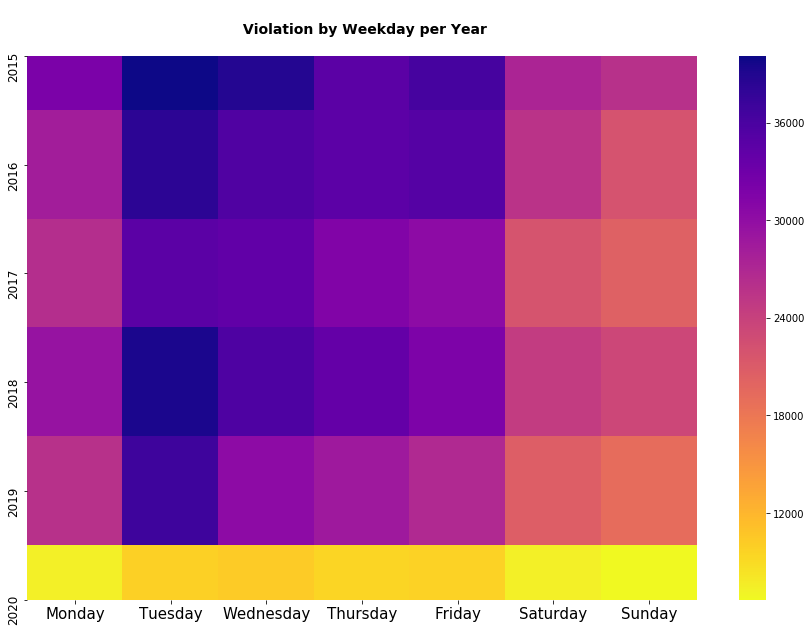

In [11]:
weekdays = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
violationweekday = traffic_new.groupby(['year', 'day']).size()
#Reshape using unstack() function in Pandas python: 
violationweekday = violationweekday.rename_axis(['year', 'day'])\
                               .unstack('day')\
                               .reindex(columns=weekdays)
plt.figure(figsize=(15,10))
sns.heatmap(violationweekday, cmap='plasma_r')
plt.title('\n Violation by Weekday per Year\n', fontsize=14, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.savefig('images/violationsbyweekdayperyear.jpg')
plt.show()

In [12]:
violationweekday

day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
year,,,,,,,
2015,31965,40101,38904,34639,36405,27429,25927
2016,28306,38352,35621,34507,35200,25729,22043
2017,26312,34669,34104,31355,30321,21927,20482
2018,29418,39336,35747,33962,31870,24658,23296
2019,25906,37015,30416,28719,26800,20645,19099
2020,7398,9877,10246,9438,9802,7354,6673


## How the total violation changed over season?

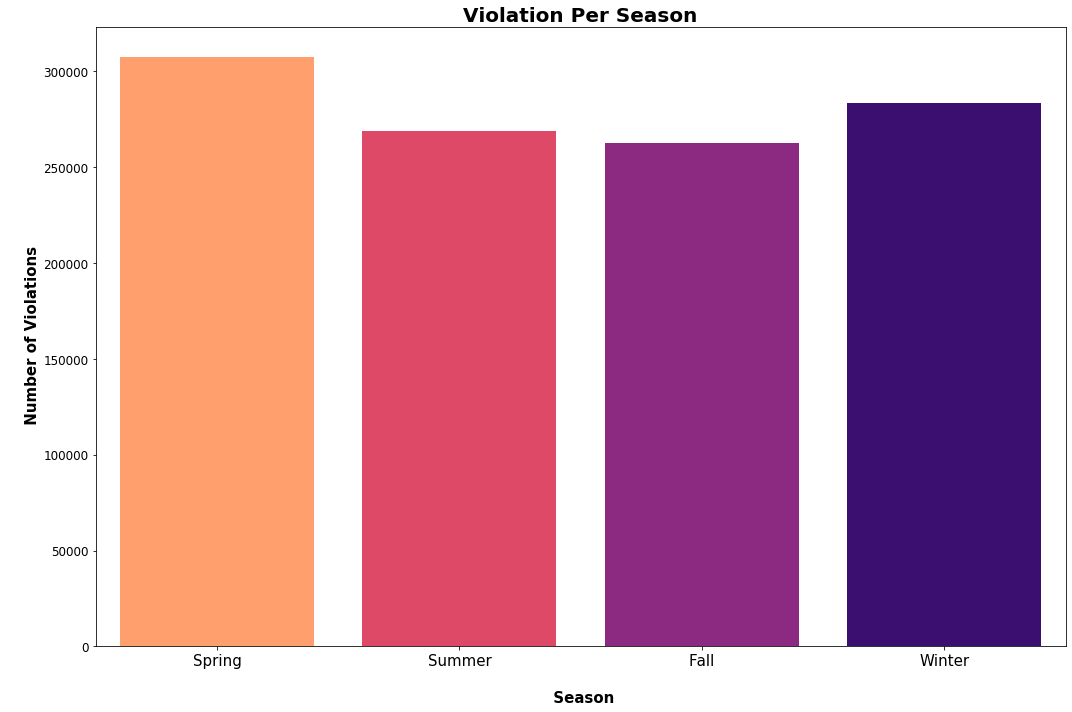

In [13]:
violationperseason = traffic_new.groupby(['season'])['Violation'].count()
season_order=['Spring', 'Summer', 'Fall','Winter']
#plot
plt.figure(figsize=(15,10))

sns.barplot(violationperseason.index,violationperseason.values, order=season_order, 
            saturation=1, palette='magma_r')
plt.title("Violation Per Season",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("\n Season", fontsize=15, fontweight="bold")
plt.ylabel("\n Number of Violations", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.savefig('images/violationperseason.jpg')

## Grouping the time to determine the rush hour traffic

In [14]:
traffic_new['Rush_time']=traffic_new['TimeOfStop'].dt.hour
#create Rush Time by grouping

def rushhour(hour):
    if hour >= 6 and hour < 10:
        return "Morning Rush"
    elif hour >= 10 and hour < 12:
        return "Day"
    elif hour >= 12 and hour < 14:
        return "Lunch Rush"
    elif hour >= 14 and hour < 16:
        return "Afternoon"
    elif hour >= 16 and hour < 18:
        return "Evening Rush"
    elif hour >= 18 and hour < 22:
        return "Evening"
    else:
        return "Night"

In [15]:
#apply function   
traffic_new['Rush_time']= traffic_new['Rush_time'].apply(rushhour)

In [16]:
traffic_new.head()

,DateOfStop,TimeOfStop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Geolocation,date,year,month,time,hour,day,season,Violation,Rush_time
0,2015-01-01,2020-11-11 22:29:00,MCP,"4th District, Wheaton",DRIVING VEH. W/O ADEQUATE REAR REG. PLATE ILLU...,LAYHILL /GLENALLEN,39.063492,-77.051040,0,0,...,"(39.0634916666667, -77.05104)",2015-01-01,2015,1,22:29:00,22,Thursday,Winter,1,Night
1,2015-01-01,2020-11-11 04:49:00,MCP,"4th District, Wheaton",FAILURE TO DRIVE VEHICLE ON RIGHT HALF OF ROAD...,2940 HEWITT AVE,39.060972,-77.046475,0,0,...,"(39.0609716666667, -77.046475)",2015-01-01,2015,1,04:49:00,4,Thursday,Winter,1,Night
2,2015-01-01,2020-11-11 22:29:00,MCP,"4th District, Wheaton",DRIVING VEHICLE ON HIGHWAY WITHOUT CURRENT REG...,LAYHILL /GLENALLEN,39.063492,-77.051040,0,0,...,"(39.0634916666667, -77.05104)",2015-01-01,2015,1,22:29:00,22,Thursday,Winter,1,Night
3,2015-01-01,2020-11-11 23:39:00,MCP,"3rd District, Silver Spring",POSSESSING MORE THAN ONE DRIVER'S LICENSE AT A...,BROADBIRCH DRIVE / BOURNEFIELD WAY,39.055635,-76.959328,0,0,...,"(39.055635, -76.9593283333333)",2015-01-01,2015,1,23:39:00,23,Thursday,Winter,1,Night
4,2015-01-01,2020-11-11 19:52:00,MCP,"4th District, Wheaton",FAILURE TO DRIVE VEHICLE ON RIGHT HALF OF ROAD...,4411 DEWEY RD,39.056280,-77.086100,1,0,...,"(39.05628, -77.0861)",2015-01-01,2015,1,19:52:00,19,Thursday,Winter,1,Evening


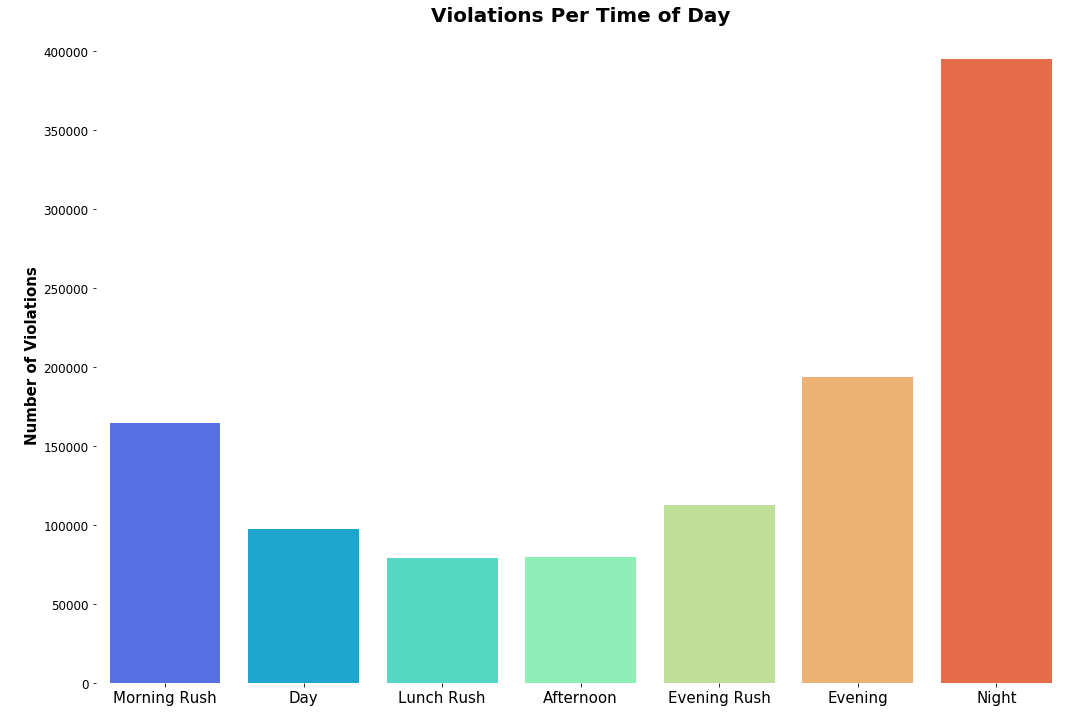

In [17]:
#"Morning Rush (6-10)", "Day (10-12)", "Lunch Rush (12-14)","Afternoon (14-16)",
#"Evening" Rush (16-18)", "Evening (18-22)", "Night (22-6)"
viol_rushtime = traffic_new.groupby(['Rush_time'])['Violation'].count()

plt.figure(figsize=(15,10))
busy_time=["Morning Rush", "Day", "Lunch Rush", "Afternoon",
     "Evening Rush", "Evening", "Night"]
sns.barplot(viol_rushtime.index, viol_rushtime.values, order=busy_time, palette='rainbow')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Violations Per Time of Day",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)

plt.xlabel("", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Violations", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.savefig('images/viol_rushtime.jpg')

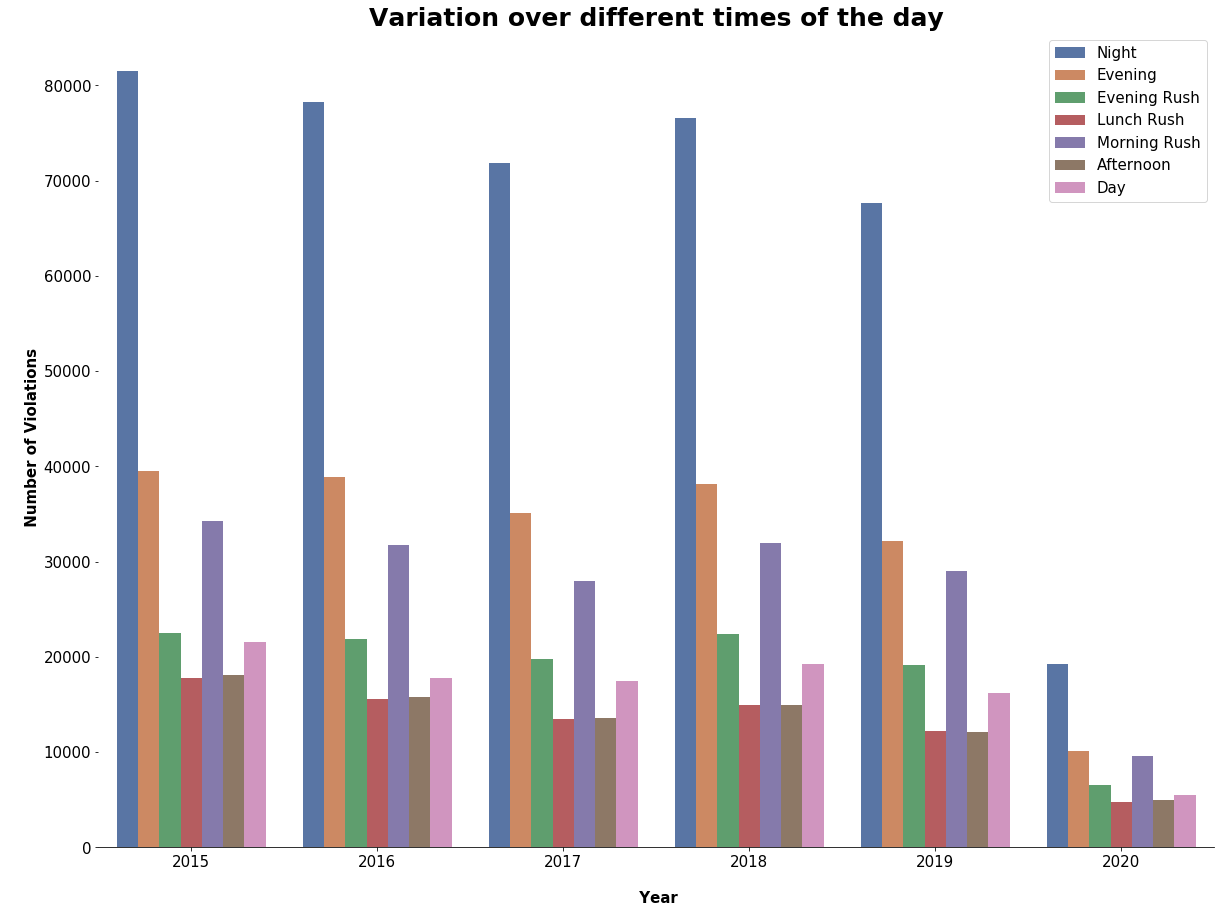

In [18]:
plt.figure(figsize=(20,15))
ax=sns.countplot('year', hue ='Rush_time', 
              palette="deep", data=traffic_new)

#plt.style.use('classic')
plt.title("Variation over different times of the day",fontsize=25,fontweight="bold")
plt.xlabel("\n Year", fontsize=15, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='22', loc = 'upper right')
plt.ylabel("\n Number of Violations", fontsize=15, fontweight="bold")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize='15', loc='upper right', ncol=1)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.despine(top=True, right=True, left=True, bottom=False)
#plt.savefig('Total_Violation_and_type_of_vehicle_involved.jpg')
#for p in ax.patches:
#    height = p.get_height()
#    ax.text(p.get_x()+p.get_width()/2.,
#            height + 4,
#            '{:1.3f}%'.format(height/nstotal*100),
#            ha="center",fontsize=12) 
plt.savefig('images/viol_rushtime_year.jpg')

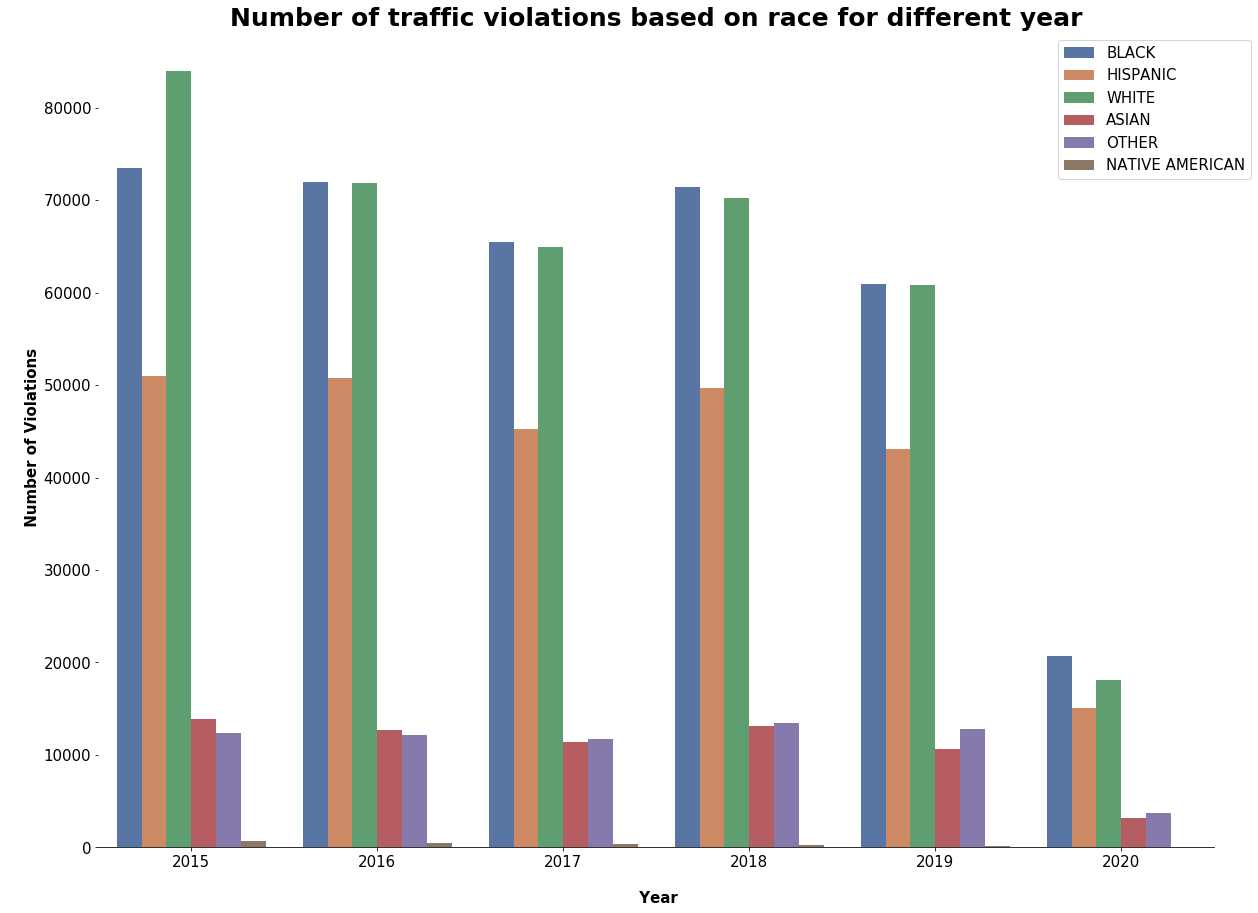

In [19]:
#nstotal= float(len(traffic_new.Race))
#percent = 100*traffic_features.Race.sum()/traffic_features.shape[0]
plt.figure(figsize=(20,15))
ax=sns.countplot('year', hue="Race",
              palette="deep", data=traffic_new)
plt.title("Number of traffic violations based on race for different year",fontsize=25,fontweight="bold")
plt.xlabel("\n Year", fontsize=15, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='22', loc = 'upper right')
plt.ylabel("\n Number of Violations", fontsize=15, fontweight="bold")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize='15', bbox_to_anchor=(1.04, 1), loc='upper right', ncol=1)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.despine(top=True, right=True, left=True, bottom=False)
#plt.savefig('Total_Violation_and_type_of_vehicle_involved.jpg')
#for p in ax.patches:
#    height = p.get_height()
#    ax.text(p.get_x()+p.get_width()/2.,
#            height + 4,
#            '{:1.3f}%'.format(height/nstotal*100),
#            ha="center",fontsize=12) 
plt.savefig('images/violationper_raceperyear.jpg')

<Figure size 2160x2160 with 0 Axes>

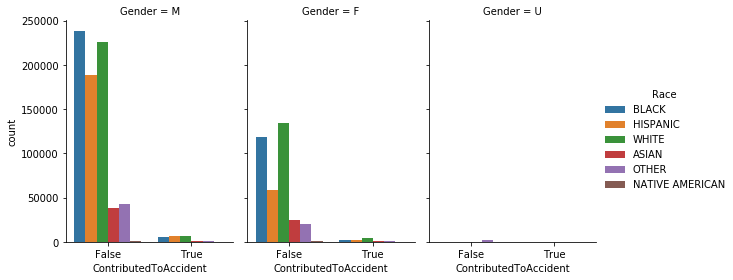

In [20]:
plt.figure(figsize=(30,30))
viol_race = sns.catplot(x="ContributedToAccident", hue="Race", col="Gender",
                data=traffic_new, kind="count",
                height=4, aspect=.7);
plt.savefig('images/violationper_race_gender.jpg')

## How does number of violations change over year and month? Which month has the highest number of violation? Is it same for every year?

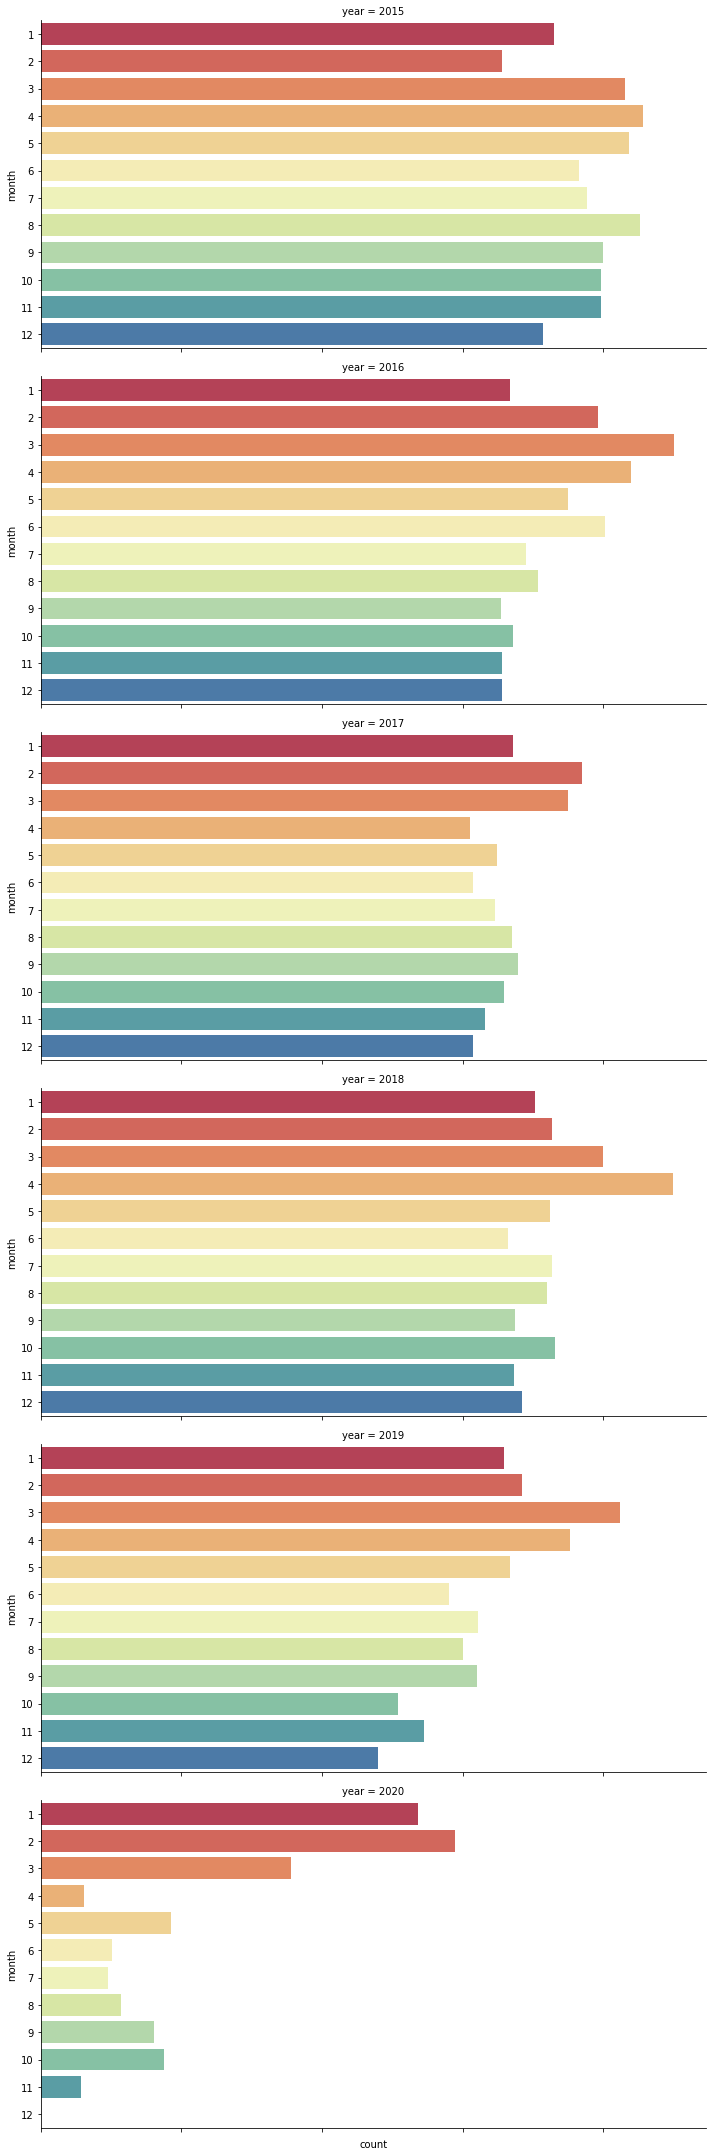

In [21]:
#plt.style.use('classic')
voiolation_year = sns.catplot(
    data=traffic_new[traffic_new['year'].isin([2020,2019,2018,2017,2016,2015])],
    y='month',
    kind='count',
    #hue ='ViolationType',
    palette='Spectral',
    row='year',
    aspect=2,
    #height=3
)
(voiolation_year.set_xticklabels(rotation=65, horizontalalignment='right'),
)
plt.savefig('images/violationperyear_month.jpg')

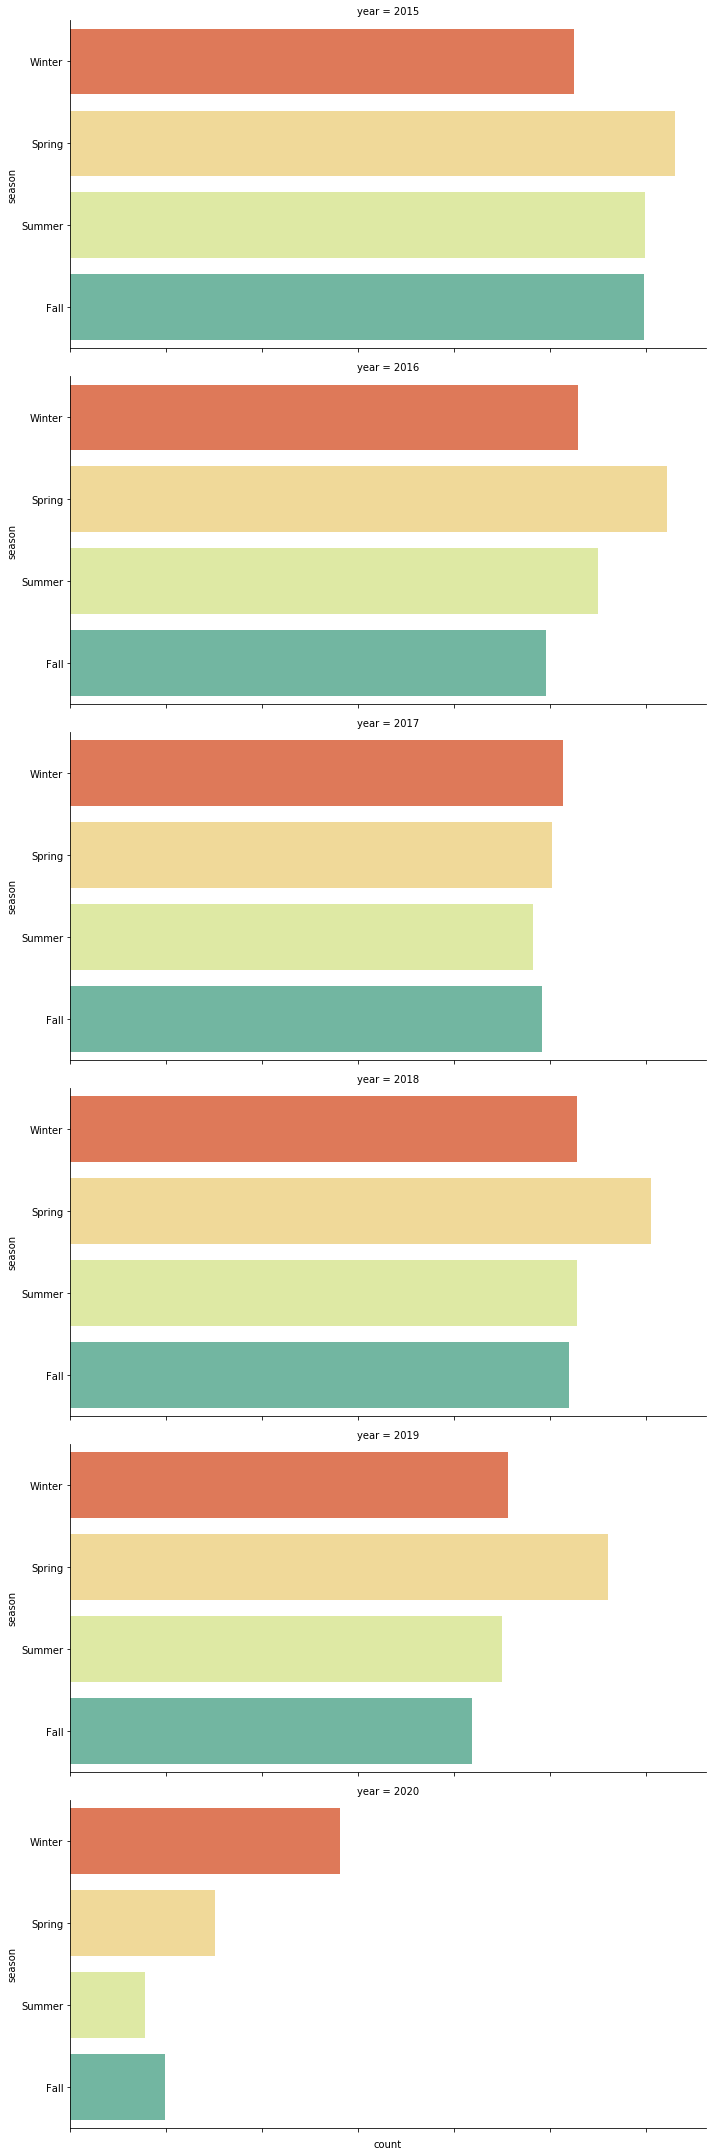

In [22]:
#plt.style.use('classic')
voiolation_year = sns.catplot(
    data=traffic_new[traffic_new['year'].isin([2020,2019,2018,2017,2016,2015])],
    y='season',
    kind='count',
    #hue ='ViolationType',
    palette='Spectral',
    row='year',
    aspect=2,
    #height=3
)
(voiolation_year.set_xticklabels(rotation=65, horizontalalignment='right'),
)
plt.savefig('images/violationperyear_seaon.jpg')

## Statistics regarding Violations 

In [23]:
def compute_violation_stats(df2):
    """Compute statistics regarding Violations"""
    n_total = len(df2)
    n_alcohol = len(df2[df2['Alcohol'] == 1])
    n_belts = len(df2[df2['Belts']  == 0])
    n_Accident = len(df2[df2['Accident']  == 1]) 
    n_Personal_Injury = len(df2[df2['PersonalInjury']  == 1]) 
    n_Property_Damage = len(df2[df2['PropertyDamage']  == 1]) 
    n_Fatal = len(df2[df2['Fatal']  == 1]) 
    n_Work_Zone = len(df2[df2['WorkZone']  == 1]) 
    return(pd.Series(data = { 
        'n_total': n_total,
        'DUI': n_alcohol,
        'n_belts': n_belts,
        'n_Accident' :n_Accident,
        'n_Personal Injury' : n_Personal_Injury,
        'n_Property Damage' :  n_Property_Damage, 
        'n_Fatal' : n_Fatal,
        'n_WorkZone' : n_Work_Zone
        
    }))

In [24]:
compute_violation_stats(traffic_new).astype(int)

n_total              1121973
DUI                     1059
n_belts              1091949
n_Accident             29353
n_Personal Injury      13053
n_Property Damage      22894
n_Fatal                  269
n_WorkZone               288
dtype: int32


# 2. Crash Reporting Incidents Data <a class="anchor" id="sec4"></a> 

## Reading "Crash Reporting Incidents Data" <a class="anchor" id="subsec_4_1"></a>  

In [25]:
    # Reading csv file
    #CRI= pd.read_csv("Crash_Reporting_-_Incidents_Data.csv")
    
    ## Downloading & Reading csv file from website
    url_CRI = 'https://data.montgomerycountymd.gov/api/views/bhju-22kf/rows.csv?accessType=DOWNLOAD'
    CRI = pd.read_csv(url_CRI,low_memory=False)

In [26]:
"""" UseFeatues() Function when called, returns a dataframe with additional features"""

def useFeatures(CRI):

    ## Formatting the Date
    
    # Confirm the date column is in datetime format
    CRI['Crash Date/Time'] = pd.to_datetime(CRI['Crash Date/Time'])
   
    # creating  new columns: date, year, month, day, time 
    CRI['date'] = pd.to_datetime(CRI['Crash Date/Time'])
    CRI['year'] = CRI['Crash Date/Time'].dt.year
    CRI['month'] = CRI['Crash Date/Time'].dt.month
    CRI['time'] = CRI['Crash Date/Time'].dt.time
    CRI['hour'] = CRI['Crash Date/Time'].dt.hour
    CRI['day'] = CRI['Crash Date/Time'].dt.weekday_name
    
    CRI = CRI.sort_values(by='date')
    

    
    ## Filtering the Desired Date Range - 2015 to 2020 ##
    CRI = CRI[CRI.date >='01/01/2017']
    CRI = CRI[CRI.date <'11/10/2020']
    CRI = CRI.reset_index(drop=True)
    
    CRI['season']= "Fall"
    CRI.loc[(CRI['month'] < 3) | (CRI['month'] >= 12), "season"] = 'Winter'
    CRI.loc[(CRI['month'] < 6) & (CRI['month'] >= 3), "season"] = 'Spring'
    CRI.loc[(CRI['month'] < 9) & (CRI['month'] >= 6), "season"] = 'Summer'
    
    ## Hour status
    ##traffic["hourStatus"] = "Evening"
    ## traffic.loc[( traffic["hour"] < 18) & ( traffic["wdayStatus"] == "Weekday"), "hourStatus"]="WorkHour"
    
    #Creating a new column to count the total number of violation
    CRI['crash'] = pd.Series(1, index=CRI.index)
    
    return CRI

In [27]:
# All the above features are stored in new data frame "CRI_features"
CRI_features = useFeatures(CRI)

In [28]:
CRI_features.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Mile Point Direction,Lane Direction,...,Longitude,Location,date,year,month,time,hour,day,season,crash
0,DM83880018,17000002,Takoma Park Police Depart,Property Damage Crash,2017-01-01 00:00:00,No,Maryland (State),6.70,East,East,...,-76.985621,"(38.98738452, -76.98562145)",2017-01-01 00:00:00,2017,1,00:00:00,0,Sunday,Winter,1
1,HA24160006,17000001,Maryland-National Capital,Injury Crash,2017-01-01 00:49:00,Yes,Government,1.53,West,West,...,-77.013004,"(39.00253552, -77.01300412)",2017-01-01 00:49:00,2017,1,00:49:00,0,Sunday,Winter,1
2,MCP2900001Z,17000018,Montgomery County Police,Property Damage Crash,2017-01-01 01:16:00,No,County,1.42,South,West,...,-77.151880,"(39.14102, -77.15188)",2017-01-01 01:16:00,2017,1,01:16:00,1,Sunday,Winter,1
3,MCP29500017,17000020,Montgomery County Police,Property Damage Crash,2017-01-01 01:30:00,No,NaN,NaN,NaN,NaN,...,-77.234480,"(39.17991167, -77.23448)",2017-01-01 01:30:00,2017,1,01:30:00,1,Sunday,Winter,1
4,MCP2771000T,17000028,Montgomery County Police,Property Damage Crash,2017-01-01 02:18:00,No,Maryland (State),15.43,North,South,...,-77.212322,"(39.15262419, -77.21232176)",2017-01-01 02:18:00,2017,1,02:18:00,2,Sunday,Winter,1


In [29]:
## Replace white space everywhere
CRI_features.columns =CRI_features.columns.str.replace(' ', '')

In [30]:
CRI_features.columns

Index(['ReportNumber', 'LocalCaseNumber', 'AgencyName', 'ACRSReportType',
       'CrashDate/Time', 'Hit/Run', 'RouteType', 'MilePoint',
       'MilePointDirection', 'LaneDirection', 'LaneNumber', 'LaneType',
       'NumberofLanes', 'Direction', 'Distance', 'DistanceUnit', 'RoadGrade',
       'NonTraffic', 'RoadName', 'Cross-StreetType', 'Cross-StreetName',
       'Off-RoadDescription', 'Municipality', 'RelatedNon-Motorist', 'AtFault',
       'CollisionType', 'Weather', 'SurfaceCondition', 'Light',
       'TrafficControl', 'DriverSubstanceAbuse', 'Non-MotoristSubstanceAbuse',
       'FirstHarmfulEvent', 'SecondHarmfulEvent', 'FixedOjectStruck',
       'Junction', 'IntersectionType', 'IntersectionArea', 'RoadAlignment',
       'RoadCondition', 'RoadDivision', 'Latitude', 'Longitude', 'Location',
       'date', 'year', 'month', 'time', 'hour', 'day', 'season', 'crash'],
      dtype='object')

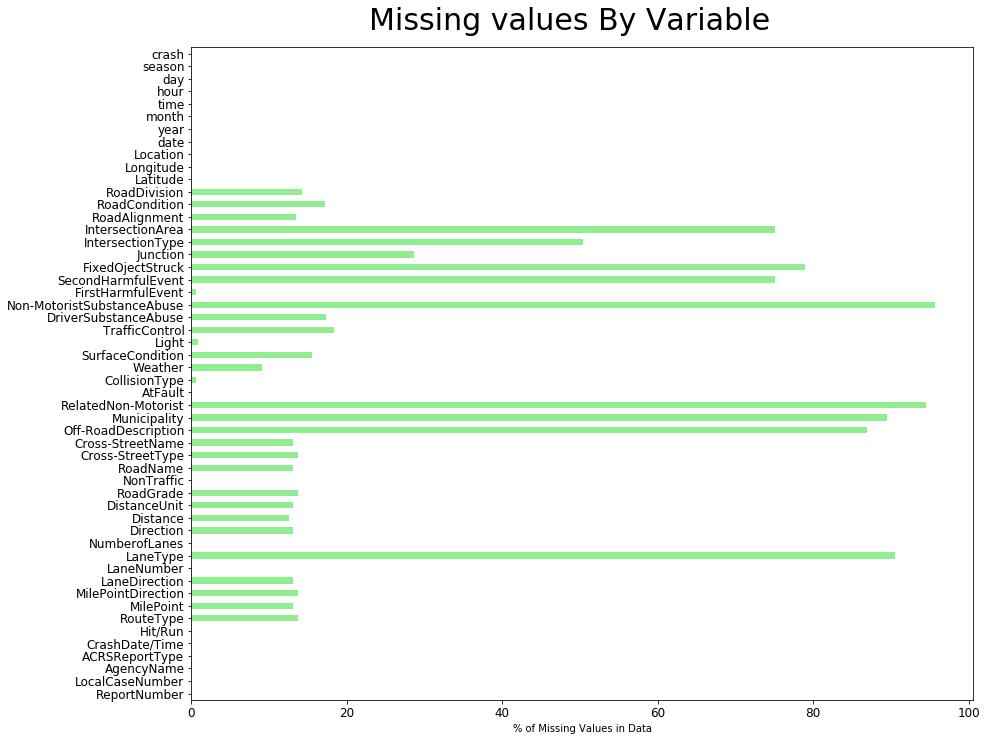

In [31]:
    missing_var = 100*CRI_features.isnull().sum()/CRI_features.shape[0]
    missing_var.sort_values()
   # print(100*traffic_features.isnull().sum()/traffic_features.shape[0]) #missing_var2.index
    plot = missing_var.plot(kind='barh',figsize=(14,12), grid = False,label="Percentage",color='lightgreen',fontsize=12)
    plot.set_xlabel("% of Missing Values in Data")
    plt.figtext(.5,0.9,'Missing values By Variable',fontsize=30,ha='center')
    plt.savefig('images/CRI_mis_val.jpg')

### Renaming & Replace

> The column name *Agency name* is changed *Agency* and "Montgomery County Police" is changed to "MCP" as in traffic violation data.

In [32]:
 # Replace all NaN's by 0
CRI_new = CRI_features.fillna(0)

#Renaming the column and replacing 
CRI_new = CRI_new.rename(columns={"AgencyName": "Agency"})
CRI_new = CRI_new.replace({'Agency' : {'Montgomery County Police' : 'MCP', 'Rockville Police Departme' : 'RPD'}})
CRI_new.head()

,ReportNumber,LocalCaseNumber,Agency,ACRSReportType,CrashDate/Time,Hit/Run,RouteType,MilePoint,MilePointDirection,LaneDirection,...,Longitude,Location,date,year,month,time,hour,day,season,crash
0,DM83880018,17000002,Takoma Park Police Depart,Property Damage Crash,2017-01-01 00:00:00,No,Maryland (State),6.70,East,East,...,-76.985621,"(38.98738452, -76.98562145)",2017-01-01 00:00:00,2017,1,00:00:00,0,Sunday,Winter,1
1,HA24160006,17000001,Maryland-National Capital,Injury Crash,2017-01-01 00:49:00,Yes,Government,1.53,West,West,...,-77.013004,"(39.00253552, -77.01300412)",2017-01-01 00:49:00,2017,1,00:49:00,0,Sunday,Winter,1
2,MCP2900001Z,17000018,MCP,Property Damage Crash,2017-01-01 01:16:00,No,County,1.42,South,West,...,-77.151880,"(39.14102, -77.15188)",2017-01-01 01:16:00,2017,1,01:16:00,1,Sunday,Winter,1
3,MCP29500017,17000020,MCP,Property Damage Crash,2017-01-01 01:30:00,No,0,0.00,0,0,...,-77.234480,"(39.17991167, -77.23448)",2017-01-01 01:30:00,2017,1,01:30:00,1,Sunday,Winter,1
4,MCP2771000T,17000028,MCP,Property Damage Crash,2017-01-01 02:18:00,No,Maryland (State),15.43,North,South,...,-77.212322,"(39.15262419, -77.21232176)",2017-01-01 02:18:00,2017,1,02:18:00,2,Sunday,Winter,1


In [33]:
print("Size of the data frame : ", CRI_new.shape)
#info() is used to check the Information about the data and the datatypes of each respective attribute.
print("Summary of columns ", CRI_new.info(verbose = False))
#This code prints a summary of columns count and its dtypes but not per column information.
print("\n\nThe column names in the dataframe \n\n :", CRI_new.columns)

Size of the data frame :  (42287, 52)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42287 entries, 0 to 42286
Columns: 52 entries, ReportNumber to crash
dtypes: datetime64[ns](2), float64(4), int64(6), object(40)
memory usage: 16.8+ MB
Summary of columns  None


The column names in the dataframe 

 : Index(['ReportNumber', 'LocalCaseNumber', 'Agency', 'ACRSReportType',
       'CrashDate/Time', 'Hit/Run', 'RouteType', 'MilePoint',
       'MilePointDirection', 'LaneDirection', 'LaneNumber', 'LaneType',
       'NumberofLanes', 'Direction', 'Distance', 'DistanceUnit', 'RoadGrade',
       'NonTraffic', 'RoadName', 'Cross-StreetType', 'Cross-StreetName',
       'Off-RoadDescription', 'Municipality', 'RelatedNon-Motorist', 'AtFault',
       'CollisionType', 'Weather', 'SurfaceCondition', 'Light',
       'TrafficControl', 'DriverSubstanceAbuse', 'Non-MotoristSubstanceAbuse',
       'FirstHarmfulEvent', 'SecondHarmfulEvent', 'FixedOjectStruck',
       'Junction', 'IntersectionType', 'Inters

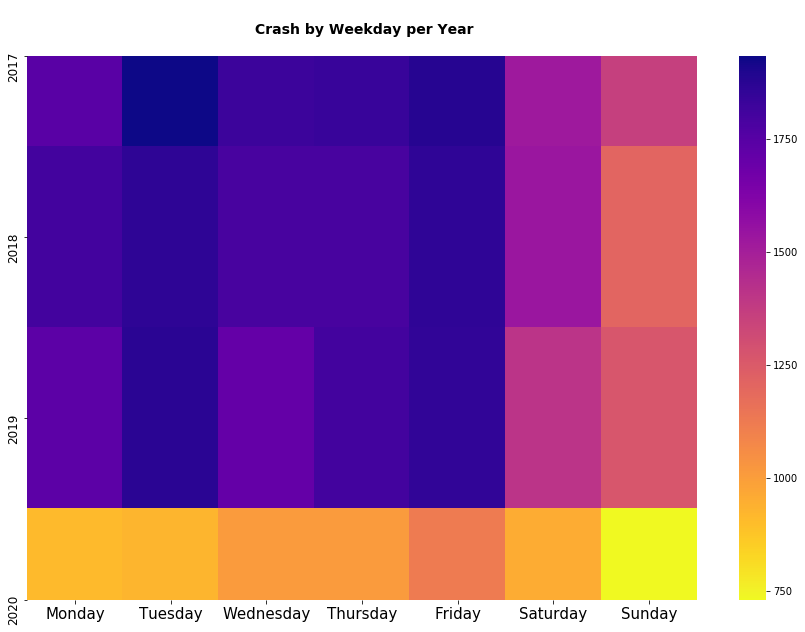

<Figure size 432x288 with 0 Axes>

In [34]:
crashweekday = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
crash_weekday = CRI_new.groupby(['year', 'day']).size()
#Reshape using unstack() function in Pandas python: 
crash_weekday = crash_weekday.rename_axis(['year', 'day'])\
                               .unstack('day')\
                               .reindex(columns=crashweekday)
plt.figure(figsize=(15,10))
sns.heatmap(crash_weekday, cmap='plasma_r')
plt.title('\n Crash by Weekday per Year\n', fontsize=14, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
#plt.savefig('crashbyweekdayperyear.jpg')
plt.show()
plt.savefig('images/CRIbyweekdayperyear.jpg')

In [35]:
CRI_new['Rush_time']=CRI_new['CrashDate/Time'].dt.hour
#create Rush Time by grouping

def rushhour_CRI(hour):
    if hour >= 6 and hour < 10:
        return "Morning Rush"
    elif hour >= 10 and hour < 12:
        return "Day"
    elif hour >= 12 and hour < 14:
        return "Lunch Rush"
    elif hour >= 14 and hour < 16:
        return "Afternoon"
    elif hour >= 16 and hour < 18:
        return "Evening Rush"
    elif hour >= 18 and hour < 22:
        return "Evening"
    else:
        return "Night"

In [36]:
#apply function   
CRI_new['Rush_time']= CRI_new['Rush_time'].apply(rushhour_CRI)

In [37]:
CRI_new.head()

,ReportNumber,LocalCaseNumber,Agency,ACRSReportType,CrashDate/Time,Hit/Run,RouteType,MilePoint,MilePointDirection,LaneDirection,...,Location,date,year,month,time,hour,day,season,crash,Rush_time
0,DM83880018,17000002,Takoma Park Police Depart,Property Damage Crash,2017-01-01 00:00:00,No,Maryland (State),6.70,East,East,...,"(38.98738452, -76.98562145)",2017-01-01 00:00:00,2017,1,00:00:00,0,Sunday,Winter,1,Night
1,HA24160006,17000001,Maryland-National Capital,Injury Crash,2017-01-01 00:49:00,Yes,Government,1.53,West,West,...,"(39.00253552, -77.01300412)",2017-01-01 00:49:00,2017,1,00:49:00,0,Sunday,Winter,1,Night
2,MCP2900001Z,17000018,MCP,Property Damage Crash,2017-01-01 01:16:00,No,County,1.42,South,West,...,"(39.14102, -77.15188)",2017-01-01 01:16:00,2017,1,01:16:00,1,Sunday,Winter,1,Night
3,MCP29500017,17000020,MCP,Property Damage Crash,2017-01-01 01:30:00,No,0,0.00,0,0,...,"(39.17991167, -77.23448)",2017-01-01 01:30:00,2017,1,01:30:00,1,Sunday,Winter,1,Night
4,MCP2771000T,17000028,MCP,Property Damage Crash,2017-01-01 02:18:00,No,Maryland (State),15.43,North,South,...,"(39.15262419, -77.21232176)",2017-01-01 02:18:00,2017,1,02:18:00,2,Sunday,Winter,1,Night


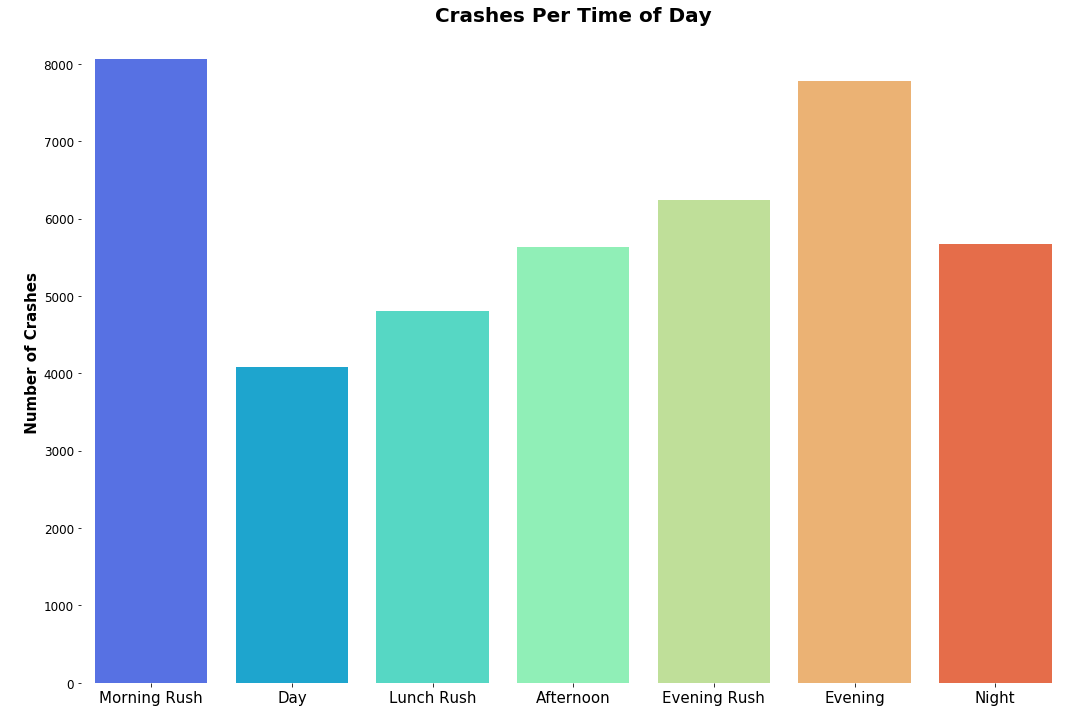

In [38]:
#"Morning Rush (6-10)", "Day (10-12)", "Lunch Rush (12-14)","Afternoon (14-16)",
#"Evening" Rush (16-18)", "Evening (18-22)", "Night (22-6)"
CRI_rushtime = CRI_new.groupby(['Rush_time'])['crash'].count()

plt.figure(figsize=(15,10))
busy_time=["Morning Rush", "Day", "Lunch Rush", "Afternoon",
     "Evening Rush", "Evening", "Night"]
sns.barplot(CRI_rushtime.index, CRI_rushtime.values, order=busy_time, palette='rainbow')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Crashes Per Time of Day",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)

plt.xlabel("", fontsize=15, fontweight="bold")
plt.ylabel("\n Number of Crashes", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.savefig('images/CRI_rushtime.jpg')

# 3. Crash Reporting – Non-Motorists Data <a class="anchor" id="sec5"></a> 

## Reading "Crash Reporting - Non-Motorists Data"  <a class="anchor" id="subsec_5_1"></a>  

In [39]:
    # Reading csv file
    #CRI= pd.read_csv("Crash_Reporting_-_Non-Motorists_Data.csv")
    
    ## Downloading & Reading csv file from website
    url_CRNM = 'https://data.montgomerycountymd.gov/api/views/n7fk-dce5/rows.csv?accessType=DOWNLOAD'
    CRNM = pd.read_csv(url_CRNM,low_memory=False)

In [40]:
"""" UseFeatues() Function when called, returns a dataframe with additional features"""

def useFeatures(CRNM):

    ## Formatting the Date
    
    # Confirm the date column is in datetime format
    CRNM['Crash Date/Time'] = pd.to_datetime(CRNM['Crash Date/Time'])
   
    # creating  new columns: date, year, month, day, time 
    CRNM['date'] = pd.to_datetime(CRNM['Crash Date/Time'])
    CRNM['year'] = CRNM['Crash Date/Time'].dt.year
    CRNM['month'] = CRNM['Crash Date/Time'].dt.month
    CRNM['time'] = CRNM['Crash Date/Time'].dt.time
    CRNM['hour'] = CRNM['Crash Date/Time'].dt.hour
    CRNM['day'] = CRNM['Crash Date/Time'].dt.weekday_name
    
    CRNM = CRNM.sort_values(by='date')
    

    
    ## Filtering the Desired Date Range - 2015 to 2020 ##
    CRNM = CRNM[CRNM.date >='01/01/2017']
    CRNM = CRNM[CRNM.date <'10/23/2020']
    CRNM = CRNM.reset_index(drop=True)
    
    CRNM['season']= "Fall"
    CRNM.loc[(CRI['month'] < 3) | (CRNM['month'] >= 12), "season"] = 'Winter'
    CRNM.loc[(CRI['month'] < 6) & (CRNM['month'] >= 3), "season"] = 'Spring'
    CRNM.loc[(CRI['month'] < 9) & (CRNM['month'] >= 6), "season"] = 'Summer'
    
    ## Hour status
    ##traffic["hourStatus"] = "Evening"
    ## traffic.loc[( traffic["hour"] < 18) & ( traffic["wdayStatus"] == "Weekday"), "hourStatus"]="WorkHour"
    
    #Creating a new column to count the total number of violation
    CRNM['crash'] = pd.Series(1, index=CRNM.index)
    
    return CRNM

In [41]:
# All the above features are stored in new data frame "CRI_features"
CRNM_features = useFeatures(CRNM)

In [42]:
CRNM_features.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Longitude,Location,date,year,month,time,hour,day,season,crash
0,MCP2712001F,17000094,Montgomery County Police,Injury Crash,2017-01-01 12:02:00,Maryland (State),NEW HAMPSHIRE AVE,Unknown,ENT TO WHITE OAK SHOPPING CENTER,NaN,...,-76.990993,"(39.04091754, -76.99099258)",2017-01-01 12:02:00,2017,1,12:02:00,12,Sunday,Fall,1
1,DD56100029,17000269,Rockville Police Departme,Injury Crash,2017-01-02 18:02:00,Municipality,BROADWOOD DR,Maryland (State),VEIRS MILL RD,NaN,...,-77.123987,"(39.077227, -77.1239875)",2017-01-02 18:02:00,2017,1,18:02:00,18,Monday,Fall,1
2,MCP02510014,17000280,Montgomery County Police,Injury Crash,2017-01-02 18:53:00,NaN,NaN,NaN,NaN,PARKING LOT OF 12001 BIRDSEYE TERR,...,-77.249343,"(39.16370333, -77.24934333)",2017-01-02 18:53:00,2017,1,18:53:00,18,Monday,Fall,1
3,MCP21070011,17000332,Montgomery County Police,Injury Crash,2017-01-03 07:32:00,Maryland (State),CLOPPER RD,County,CINNAMON DR,NaN,...,-77.264519,"(39.15610804, -77.26451889)",2017-01-03 07:32:00,2017,1,07:32:00,7,Tuesday,Fall,1
4,DD5614001T,17000330,Rockville Police Departme,Injury Crash,2017-01-03 07:35:00,Municipality,WOOTTON PKWY,Other Public Roadway,PAULSBORO DR,NaN,...,-77.182173,"(39.07759833, -77.18217333)",2017-01-03 07:35:00,2017,1,07:35:00,7,Tuesday,Fall,1


In [43]:
## Replace white space everywhere
CRNM_features.columns =CRNM_features.columns.str.replace(' ', '')


In [44]:
CRNM_features.columns

Index(['ReportNumber', 'LocalCaseNumber', 'AgencyName', 'ACRSReportType',
       'CrashDate/Time', 'RouteType', 'RoadName', 'Cross-StreetType',
       'Cross-StreetName', 'Off-RoadDescription', 'Municipality',
       'RelatedNon-Motorist', 'CollisionType', 'Weather', 'SurfaceCondition',
       'Light', 'TrafficControl', 'DriverSubstanceAbuse',
       'Non-MotoristSubstanceAbuse', 'PersonID', 'PedestrianType',
       'PedestrianMovement', 'PedestrianActions', 'PedestrianLocation',
       'PedestrianObeyedTrafficSignal', 'PedestrianVisibility', 'AtFault',
       'InjurySeverity', 'SafetyEquipment', 'Latitude', 'Longitude',
       'Location', 'date', 'year', 'month', 'time', 'hour', 'day', 'season',
       'crash'],
      dtype='object')

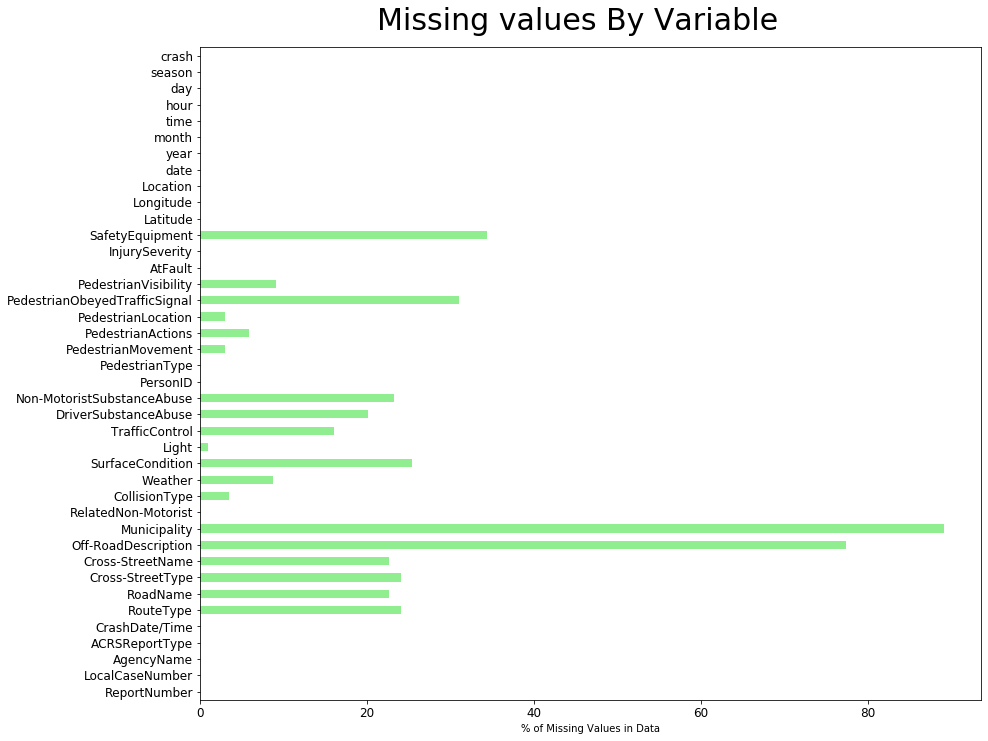

In [45]:
    missing_var = 100*CRNM_features.isnull().sum()/CRNM_features.shape[0]
    missing_var.sort_values()
   # print(100*traffic_features.isnull().sum()/traffic_features.shape[0]) #missing_var2.index
    plot = missing_var.plot(kind='barh',figsize=(14,12), grid = False,label="Percentage",color='lightgreen',fontsize=12)
    plot.set_xlabel("% of Missing Values in Data")
    plt.figtext(.5,0.9,'Missing values By Variable',fontsize=30,ha='center')
    plt.savefig('images/CRNM_mis_val.jpg')

### Renaming & Replace

> The column name *Agency name* is changed *Agency* and "Montgomery County Police" is changed to "MCP" as in traffic violation data.

In [46]:
 # Replace all NaN's by 0
CRNM_new = CRNM_features.fillna(0)

#Renaming the column and replacing 
CRNM_new = CRNM_new.rename(columns={"AgencyName": "Agency"})
CRNM_new = CRNM_new.replace({'Agency' : {'Montgomery County Police' : 'MCP', 'Rockville Police Departme' : 'RPD'}})
CRNM_new.head()

,ReportNumber,LocalCaseNumber,Agency,ACRSReportType,CrashDate/Time,RouteType,RoadName,Cross-StreetType,Cross-StreetName,Off-RoadDescription,...,Longitude,Location,date,year,month,time,hour,day,season,crash
0,MCP2712001F,17000094,MCP,Injury Crash,2017-01-01 12:02:00,Maryland (State),NEW HAMPSHIRE AVE,Unknown,ENT TO WHITE OAK SHOPPING CENTER,0,...,-76.990993,"(39.04091754, -76.99099258)",2017-01-01 12:02:00,2017,1,12:02:00,12,Sunday,Fall,1
1,DD56100029,17000269,RPD,Injury Crash,2017-01-02 18:02:00,Municipality,BROADWOOD DR,Maryland (State),VEIRS MILL RD,0,...,-77.123987,"(39.077227, -77.1239875)",2017-01-02 18:02:00,2017,1,18:02:00,18,Monday,Fall,1
2,MCP02510014,17000280,MCP,Injury Crash,2017-01-02 18:53:00,0,0,0,0,PARKING LOT OF 12001 BIRDSEYE TERR,...,-77.249343,"(39.16370333, -77.24934333)",2017-01-02 18:53:00,2017,1,18:53:00,18,Monday,Fall,1
3,MCP21070011,17000332,MCP,Injury Crash,2017-01-03 07:32:00,Maryland (State),CLOPPER RD,County,CINNAMON DR,0,...,-77.264519,"(39.15610804, -77.26451889)",2017-01-03 07:32:00,2017,1,07:32:00,7,Tuesday,Fall,1
4,DD5614001T,17000330,RPD,Injury Crash,2017-01-03 07:35:00,Municipality,WOOTTON PKWY,Other Public Roadway,PAULSBORO DR,0,...,-77.182173,"(39.07759833, -77.18217333)",2017-01-03 07:35:00,2017,1,07:35:00,7,Tuesday,Fall,1


In [47]:
print("Size of the data frame : ", CRNM_new.shape)
#info() is used to check the Information about the data and the datatypes of each respective attribute.
print("Summary of columns ", CRNM_new.info(verbose = False))
#This code prints a summary of columns count and its dtypes but not per column information.
print("\n\nThe column names in the dataframe \n\n :", CRNM_new.columns)

Size of the data frame :  (2438, 40)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Columns: 40 entries, ReportNumber to crash
dtypes: datetime64[ns](2), float64(2), int64(5), object(31)
memory usage: 762.0+ KB
Summary of columns  None


The column names in the dataframe 

 : Index(['ReportNumber', 'LocalCaseNumber', 'Agency', 'ACRSReportType',
       'CrashDate/Time', 'RouteType', 'RoadName', 'Cross-StreetType',
       'Cross-StreetName', 'Off-RoadDescription', 'Municipality',
       'RelatedNon-Motorist', 'CollisionType', 'Weather', 'SurfaceCondition',
       'Light', 'TrafficControl', 'DriverSubstanceAbuse',
       'Non-MotoristSubstanceAbuse', 'PersonID', 'PedestrianType',
       'PedestrianMovement', 'PedestrianActions', 'PedestrianLocation',
       'PedestrianObeyedTrafficSignal', 'PedestrianVisibility', 'AtFault',
       'InjurySeverity', 'SafetyEquipment', 'Latitude', 'Longitude',
       'Location', 'date', 'year', 'month', 'time', 'hour', 'day', 'sea

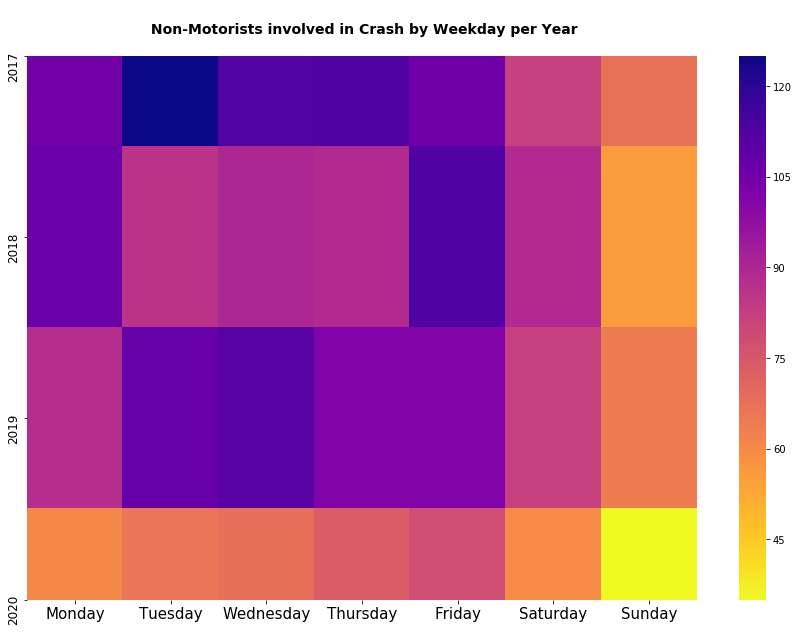

<Figure size 432x288 with 0 Axes>

In [48]:
non_motweekday = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
non_mot_weekday = CRNM_new.groupby(['year', 'day']).size()
#Reshape using unstack() function in Pandas python: 
non_mot_weekday = non_mot_weekday.rename_axis(['year', 'day'])\
                               .unstack('day')\
                               .reindex(columns=non_motweekday)
plt.figure(figsize=(15,10))
sns.heatmap(non_mot_weekday, cmap='plasma_r')
plt.title('\n Non-Motorists involved in Crash by Weekday per Year\n', fontsize=14, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.show()
plt.savefig('images/CRNMbyweekdayperyear.jpg')

In [49]:
CRNM_new['Rush_time']=CRNM_new['CrashDate/Time'].dt.hour
#create Rush Time by grouping

def rushhour_CRNM(hour):
    if hour >= 6 and hour < 10:
        return "Morning Rush"
    elif hour >= 10 and hour < 12:
        return "Day"
    elif hour >= 12 and hour < 14:
        return "Lunch Rush"
    elif hour >= 14 and hour < 16:
        return "Afternoon"
    elif hour >= 16 and hour < 18:
        return "Evening Rush"
    elif hour >= 18 and hour < 22:
        return "Evening"
    else:
        return "Night"

In [50]:
#apply function   
CRNM_new['Rush_time']= CRNM_new['Rush_time'].apply(rushhour_CRNM)

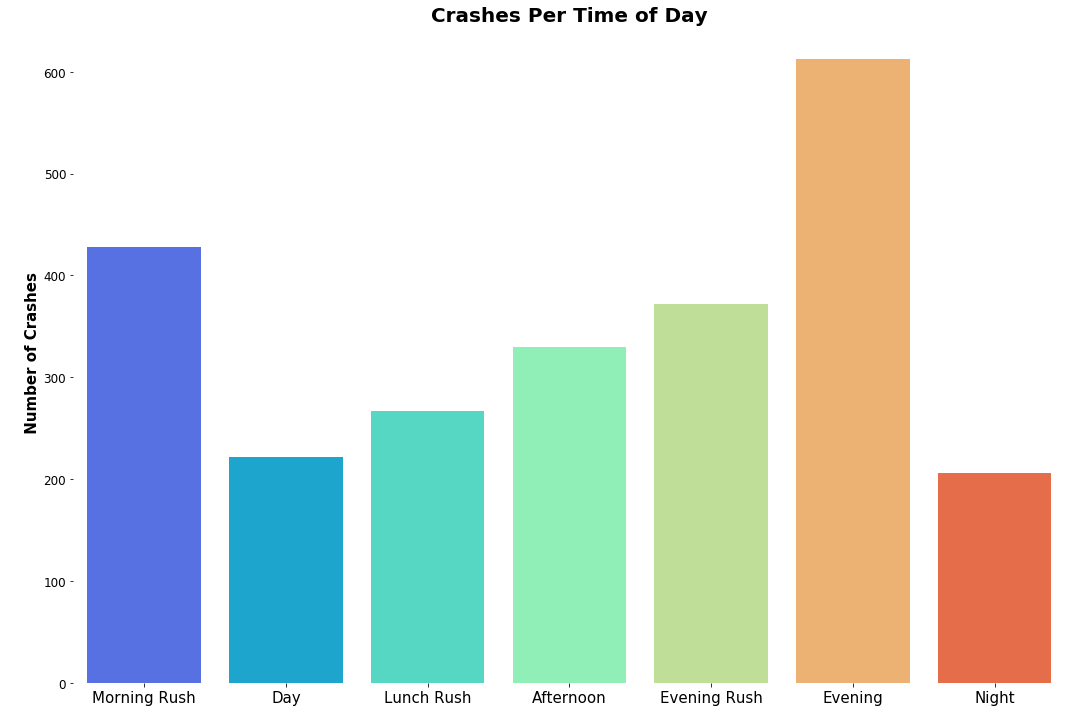

In [51]:
#"Morning Rush (6-10)", "Day (10-12)", "Lunch Rush (12-14)","Afternoon (14-16)",
#"Evening" Rush (16-18)", "Evening (18-22)", "Night (22-6)"
CRNM_rushtime = CRNM_new.groupby(['Rush_time'])['crash'].count()

plt.figure(figsize=(15,10))
busy_time=["Morning Rush", "Day", "Lunch Rush", "Afternoon",
     "Evening Rush", "Evening", "Night"]
sns.barplot(CRNM_rushtime.index, CRNM_rushtime.values, order=busy_time, palette='rainbow')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Crashes Per Time of Day",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)

plt.xlabel("", fontsize=15, fontweight="bold")
plt.ylabel("\n Number of Crashes", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.savefig('images/CRNM_rushtime.jpg')

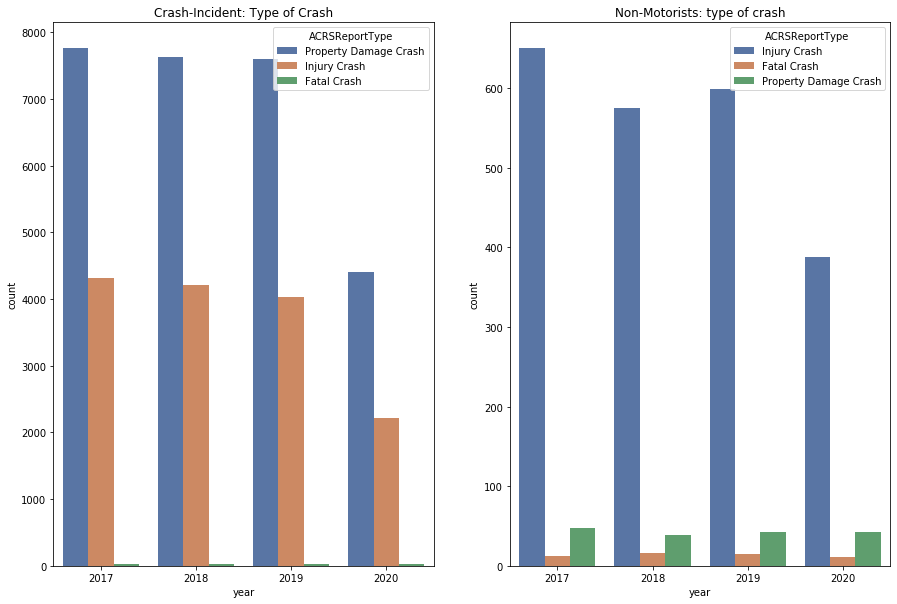

In [52]:
fig = plt.subplots(figsize=(15,10))
plt.subplot(1, 2, 1)
sns.countplot('year', hue="ACRSReportType", palette="deep", data=CRI_new)
plt.title('Crash-Incident: Type of Crash')
plt.subplot(1, 2, 2)
sns.countplot('year', hue="ACRSReportType", palette="deep", data=CRNM_new)
plt.title('Non-Motorists: type of crash')
plt.savefig('images/CRI_CRNM_crashtype.jpg')


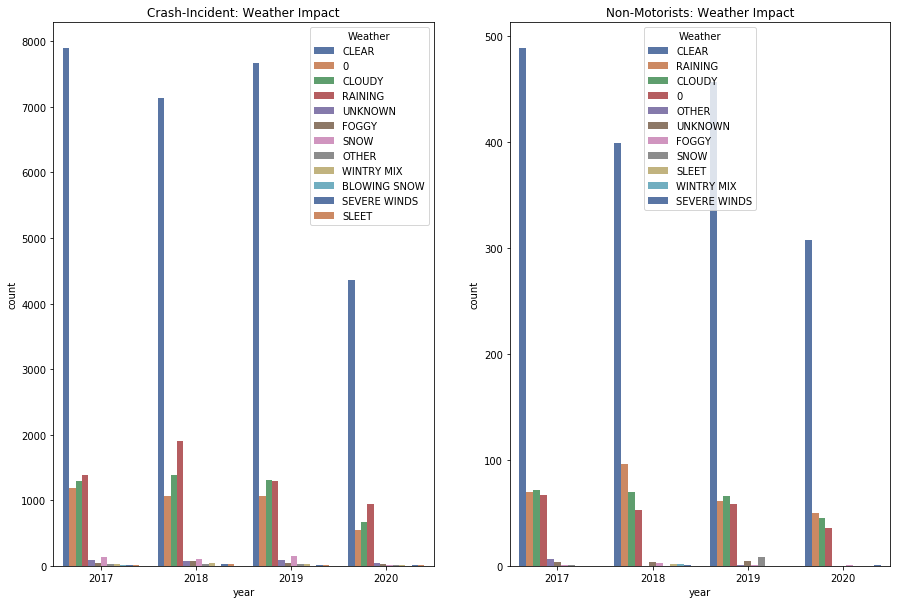

In [53]:
fig = plt.subplots(figsize=(15,10))
plt.subplot(1, 2, 1)
sns.countplot('year', hue="Weather", palette="deep", data=CRI_new)
plt.title('Crash-Incident: Weather Impact')
plt.subplot(1, 2, 2)
sns.countplot('year', hue="Weather", palette="deep", data=CRNM_new)
plt.title('Non-Motorists: Weather Impact')
plt.savefig('images/CRI_CRNM_weather_impact.jpg')

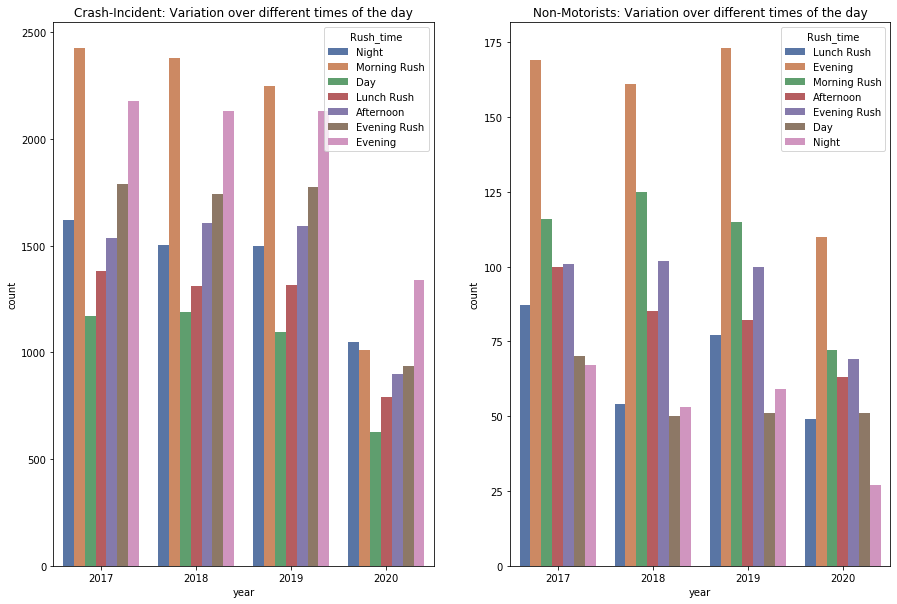

In [54]:
fig = plt.subplots(figsize=(15,10))
plt.subplot(1, 2, 1)
sns.countplot('year', hue="Rush_time", palette="deep", data=CRI_new)
plt.title('Crash-Incident: Variation over different times of the day')
plt.subplot(1, 2, 2)
sns.countplot('year', hue="Rush_time", palette="deep", data=CRNM_new)
plt.title('Non-Motorists: Variation over different times of the day')
plt.savefig('images/CRI_CRNM_rushtime.jpg')

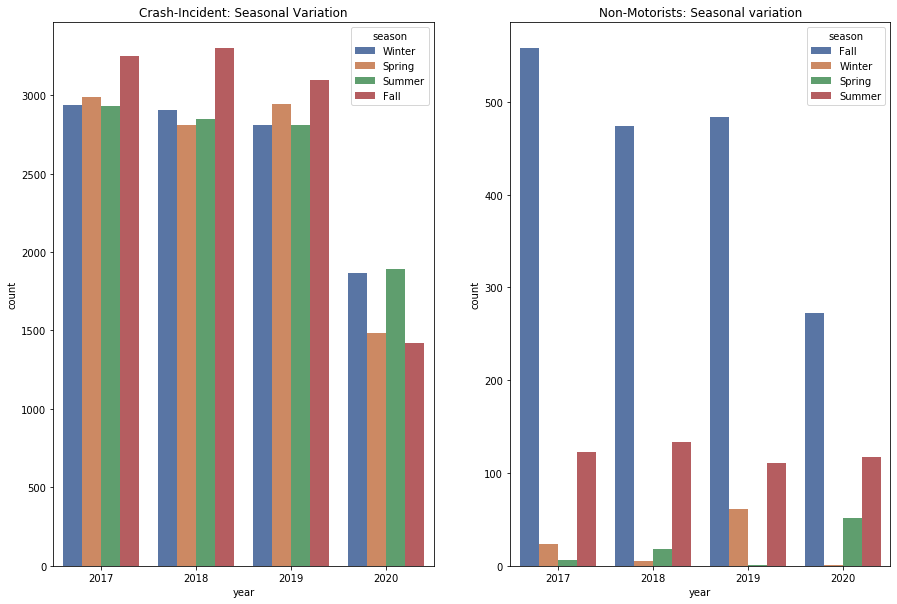

In [55]:
fig = plt.subplots(figsize=(15,10))
plt.subplot(1, 2, 1)
sns.countplot('year', hue="season", palette="deep", data=CRI_new)
plt.title('Crash-Incident: Seasonal Variation')
plt.subplot(1, 2, 2)
sns.countplot('year', hue="season", palette="deep", data=CRNM_new)
plt.title('Non-Motorists: Seasonal variation')
plt.savefig('images/CRI_CRNM_seasonal.jpg')

# Chi-Square Test

The Chi-square test of independence tests if there is a significant relationship between two categorical variables. The test is comparing the observed observations to the expected observations. 

**H0 (Null Hypothesis)**: There is no relationship between variable one and variable two.

**H1 (Alternative Hypothesis)**: There is a relationship between variable 1 and variable 2.

If the p-value is significant, we can reject the null hypothesis and claim that the findings support the alternative hypothesis.

In [106]:
!pip install researchpy

 ### Basic univariate statistics

In [107]:
import researchpy as rp
rp.summary_cat(traffic_new[["Gender", "Color"]])

,Variable,Outcome,Count,Percent
0,Gender,M,755065,67.30
1,,F,365272,32.56
2,,U,1636,0.15
3,Color,BLACK,239044,21.31
4,,SILVER,206446,18.40
5,,WHITE,182195,16.24
6,,GRAY,136455,12.16
7,,BLUE,117638,10.48
8,,RED,84999,7.58
9,,GREEN,46456,4.14


The data is majority in Male and color of the car is Black.

### CHI-SQUARE TEST USING SCIPY.STATS.CHI2_CONTINGENCY

This method requires one to pass a crosstabulation table, this can be accomplished using *pd.crosstab*.

In [92]:
#We need to import Scipy.stats 
from scipy import stats
from scipy.stats import chi2_contingency

In [90]:
tab_chi = pd.crosstab(traffic_new['Gender'], traffic_new['Color'])
tab_chi

Color,0,BEIGE,BLACK,BLUE,BRONZE,BROWN,CAMOUFLAGE,CHROME,COPPER,CREAM,...,MAROON,MULTICOLOR,ORANGE,PINK,PURPLE,RED,SILVER,TAN,WHITE,YELLOW
Gender,,,,,,,,,,,,,,,,,,,,,
F,4017,3669,75188,40263,930,1766,10,9,144,269,...,6287,88,1019,87,641,27604,70328,6442,53082,807
M,7531,7306,163565,77212,1469,2882,16,21,202,276,...,11078,668,2678,56,1300,57244,135879,12950,128744,3150
U,6,5,291,163,7,19,0,0,0,0,...,33,1,15,0,1,151,239,14,369,8


In [91]:
stats.chi2_contingency(tab_chi)

(3446.443755984601,
 0.0,
 44,
 array([[3.76154568e+03, 3.57467297e+03, 7.78236909e+04, 3.82984863e+04,
         7.83302657e+02, 1.51939879e+03, 8.46461724e+00, 9.76686605e+00,
         1.12644522e+02, 1.77431400e+02, 1.00478262e+04, 4.44245902e+04,
         1.51243176e+04, 5.66413118e+03, 2.46450587e+02, 1.20848689e+03,
         4.65553948e+01, 6.32241795e+02, 2.76724616e+04, 6.72110143e+04,
         6.31786008e+03, 5.93158053e+04, 1.29085413e+03],
        [7.77560691e+03, 7.38931659e+03, 1.60871748e+05, 7.91679804e+04,
         1.61918904e+03, 3.14079604e+03, 1.74974710e+01, 2.01893896e+01,
         2.32850960e+02, 3.66773911e+02, 2.07701710e+04, 9.18314385e+04,
         3.12639428e+04, 1.17085000e+04, 5.09445597e+02, 2.49810047e+03,
         9.62360904e+01, 1.30692649e+03, 5.72025975e+04, 1.38933957e+05,
         1.30598431e+04, 1.22613528e+05, 2.66836432e+03],
        [1.68474143e+01, 1.60104388e+01, 3.48560958e+02, 1.71533333e+02,
         3.50829833e+00, 6.80516554e+00, 3.7911785

The first value (3446.443755984601) is the Chi-square value, 

The second value p-value (0),

Third value represents degrees of freedom (44), 

and lastly it outputs the expected frequencies as an array.

Since all of the expected frequencies are greater than 5, the chi2 test results can be trusted. We can reject the null hypothesis as the p-value is less than 0.05.

### CHI-SQUARE TEST OF INDEPENDENCE WITH RESEARCHPY
This method needs *researchpy.crosstab*. *researchpy* is essentially a wrapper that combines various established packages such as pandas, scipy.stats, and statsmodels to get all the standard required information in one method.

In [111]:
tab_chi, test_results, expected = rp.crosstab(traffic_new["Gender"], traffic_new["Color"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

tab_chi

Color                                                                  \
           0 BEIGE  BLACK   BLUE BRONZE BROWN CAMOUFLAGE CHROME COPPER CREAM   
Gender                                                                         
F       0.36  0.33   6.70   3.59   0.08  0.16        0.0    0.0   0.01  0.02   
M       0.67  0.65  14.58   6.88   0.13  0.26        0.0    0.0   0.02  0.02   
U       0.00  0.00   0.03   0.01   0.00  0.00        0.0    0.0   0.00  0.00   
All     1.03  0.98  21.31  10.48   0.21  0.42        0.0    0.0   0.03  0.05   

        ...                                                                  \
        ... MULTICOLOR ORANGE  PINK PURPLE   RED SILVER   TAN  WHITE YELLOW   
Gender  ...                                                                   
F       ...       0.01   0.09  0.01   0.06  2.46   6.27  0.57   4.73   0.07   
M       ...       0.06   0.24  0.00   0.12  5.10  12.11  1.15  11.47   0.28   
U       ...       0.00   0.00  0.00   0.00  0.01   0.02  0.00   0.03   0.00   
All     ...       0.07   0.33  0.01   0.17  7.58  18.40  1.73  16.24   0.35   

                
           All  
Gender          
F        32.56  
M        67.30  
U         0.15  
All     100.00  

[4 rows x 24 columns]

In [112]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 44.0) =,3446.4438
1,p-value =,0.0000
2,Cramer's V =,0.0392


In [117]:
tab2_chi, test_results, expected = rp.crosstab(traffic_new["Alcohol"], traffic_new["Rush_time"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

tab2_chi

Rush_time                                                            \
        Afternoon   Day Evening Evening Rush Lunch Rush Morning Rush  Night   
Alcohol                                                                       
0            7.08  8.70   17.27        10.00       7.02        14.65  35.19   
1            0.01  0.00    0.02         0.01       0.01         0.01   0.03   
All          7.09  8.71   17.28        10.01       7.03        14.66  35.22   

                 
            All  
Alcohol          
0         99.91  
1          0.09  
All      100.00

In [118]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 6.0) =,98.8461
1,p-value =,0.0000
2,Cramer's V =,0.0094


In [119]:
expected

Rush_time                                              \
            Afternoon           Day        Evening   Evening Rush   
Alcohol                                                             
0        79442.945108  97593.796824  193730.969815  112192.004952   
1           75.054892     92.203176     183.030185     105.995048   

                                                     
           Lunch Rush   Morning Rush          Night  
Alcohol                                              
0        78788.563345  164361.716849  394804.003107  
1           74.436655     155.283151     372.996893

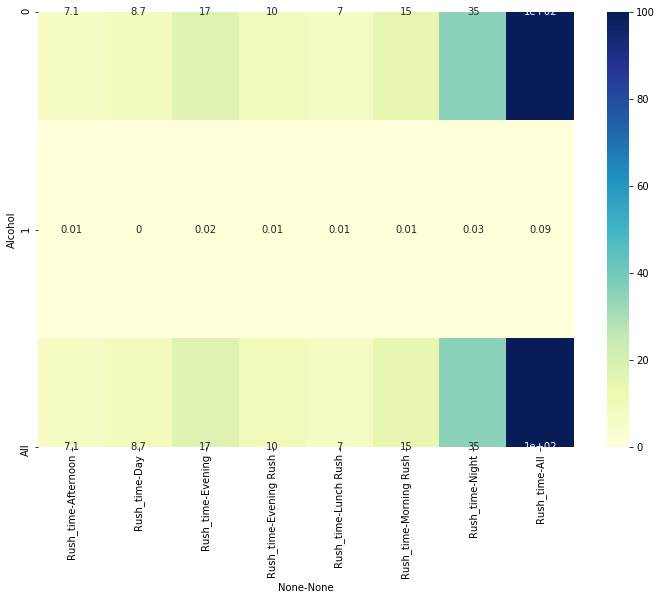

In [121]:
plt.figure(figsize=(12,8)) 
sns.heatmap(tab2_chi, annot=True, cmap="YlGnBu")

In [82]:
# selecting the columns
#traffic_columns = traffic_new[['Gender', 'Color', 'Race', '', 'year']]
#traffic_model = traffic_columns.copy()
#from scipy import stats
#stats.chi2_contingency(traffic_model)

# Random Forest

In [56]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

In [57]:
features=['month', 'year', 'hour' ]
X=CRI_new[features]  # Features
y=CRI_new.crash

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [58]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, n_jobs=6)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_list = [clf]
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("ROC score",roc_auc_score(y_test, y_pred))
print("F1 score",f1_score(y_test, y_pred))

Accuracy: 1.0


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

No handles with labels found to put in legend.


hour     0.0
year     0.0
month    0.0
dtype: float64


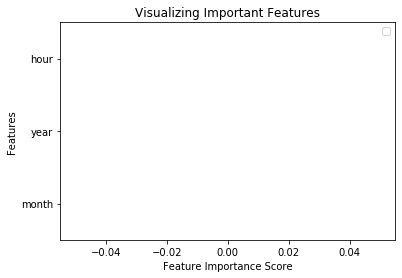

In [59]:
# Creating a bar plot
feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)
print(feature_imp)
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

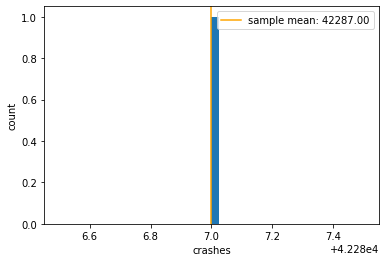

In [61]:
x = CRI_new['crash'].count()
x_mean = np.mean(x)
plt.hist(x, bins=40)
plt.axvline(x_mean, color='orange', label='sample mean: %.2f' % x_mean)
plt.xlabel('crashes')
plt.ylabel('count')
plt.legend(loc=1)
plt.show()

## Selectiong Feature and Target variables

In [63]:
# Selecting Feature and Target variables
features = np.array(traffic_new.drop(['Gender'], 1))
target = np.array(traffic_new['Gender'])

In [64]:
#Dividing the data randomly into training and test set
X_train, X_test, y_train, y_test = train_test_split(features,target, 
                                                    test_size=0.2,random_state=0)

After splitting the data, 75% data will be used for model training and 25% for model testing.

In [66]:
print ('Shape of X:', features.shape)
print ('Shape of y:', target.shape)
print ('Shape of X_train:', X_train.shape)
print ('Shape of y_train:', y_train.shape)
print ('Shape of X_test:', X_test.shape)
print ('Shape of y_test:', y_test.shape)

Shape of X: (1121973, 43)
Shape of y: (1121973,)
Shape of X_train: (897578, 43)
Shape of y_train: (897578,)
Shape of X_test: (224395, 43)
Shape of y_test: (224395,)


In [67]:
# import the class
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
## fit the model with data
logmodel.fit(X_train, y_train)
y_pred = logmodel.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



TypeError: float() argument must be a string or a number, not 'Timestamp'

In [ ]:
print('Accuracy1 :',logmodel.score(X_train,y_train))
print('Accuracy2 :',logmodel.score(X_test,y_test))

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

## Visualization of Confusion Matrix using Heatmap

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))